In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv(r"C:\Users\SwBatta\Documents\ML Guild contest\Urban Sound Classification\train.csv")
train.shape

(5435, 2)

In [2]:
train.head()

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark


In [3]:
test = pd.read_csv(r"C:\Users\SwBatta\Documents\ML Guild contest\Urban Sound Classification\test.csv")
test.shape

(3297, 1)

In [4]:
test.head()

,ID
0,5
1,7
2,8
3,9
4,13


In [5]:
%matplotlib inline
import scipy.special
import librosa
import matplotlib.pyplot as plt
import librosa.display

#Let's see how a signal looks like

In [7]:
data, sampling_rate = librosa.load(r'C:\Users\SwBatta\Documents\ML Guild contest\Urban Sound Classification\Train\79.wav')

Populating the interactive namespace from numpy and matplotlib


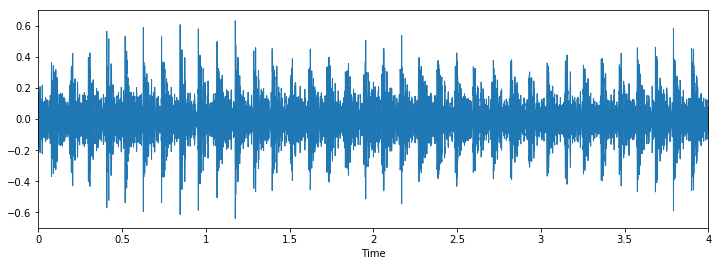

In [8]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)



In [9]:
train.Class.value_counts()


jackhammer          668
engine_idling       624
siren               607
dog_bark            600
children_playing    600
air_conditioner     600
drilling            600
street_music        600
car_horn            306
gun_shot            230
Name: Class, dtype: int64

#Observe a random signal from input data

Class:  children_playing


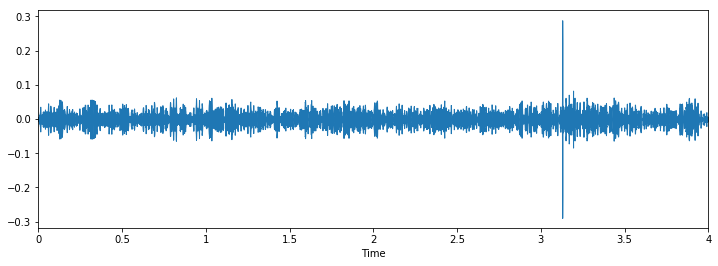

In [11]:
data_dir = r'C:\Users\SwBatta\Documents\ML Guild contest\Urban Sound Classification'

i = random.choice(train.index)
audio_name = train.ID[i]
file_name = os.path.join(os.path.abspath(data_dir), 'Train', str(audio_name) + '.wav')
print('Class: ', train.Class[i])
x, sr = librosa.load(os.path.join(os.path.abspath(data_dir), 'Train', str(audio_name) + '.wav'))


plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

Class:  siren


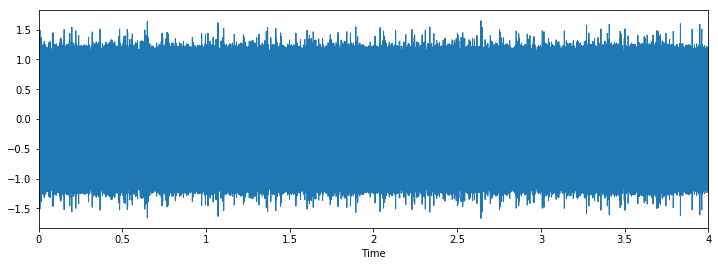

In [12]:
data_dir = r'C:\Users\SwBatta\Documents\ML Guild contest\Urban Sound Classification'

i = random.choice(train.index)
audio_name = train.ID[i]
file_name = os.path.join(os.path.abspath(data_dir), 'Train', str(audio_name) + '.wav')
print('Class: ', train.Class[i])
x, sr = librosa.load(os.path.join(os.path.abspath(data_dir), 'Train', str(audio_name) + '.wav'))


plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

Class:  dog_bark


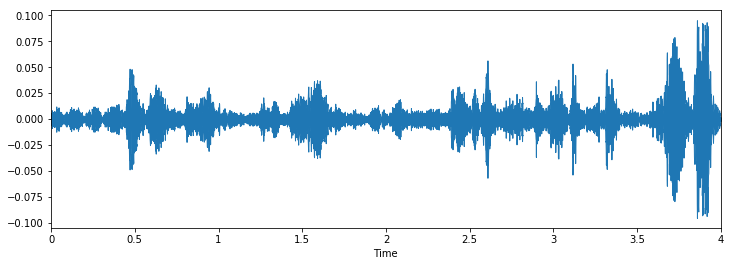

In [13]:
i = random.choice(train.index)
audio_name = train.ID[i]
file_name = os.path.join(os.path.abspath(data_dir), 'Train', str(audio_name) + '.wav')
print('Class: ', train.Class[i])
x, sr = librosa.load(os.path.join(os.path.abspath(data_dir), 'Train', str(audio_name) + '.wav'))


plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

# Functions to parse the audio files and create Feature vectors

In [14]:
def parser(row):
   # function to load files and extract features
   
   # handle exception to check if there isn't a file which is corrupted
   try:
      # here kaiser_fast is a technique used for faster extraction
      X, sample_rate = librosa.load(file_name) 
      # we extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
   except Exception as e:
      print("Error encountered while parsing file: ", file_name)
      return(None, None)
 
   feature = mfccs
   label = row.Class
 
   return([feature, label])


def parser(file_name):
    # function to load files and extract features
    X, sample_rate = librosa.load(file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    feature = mfccs
    label = row.Class
    return [feature, label]




In [18]:
file_name = os.path.join(os.path.abspath(data_dir), 'Train', train.ID[1] + '.wav')

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U21') dtype('<U21') dtype('<U21')

In [19]:
range(len(train))

range(0, 5435)

In [20]:
#Convert class to number


def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

from sklearn.preprocessing import LabelEncoder



def parse_audio_files(data):
    features, labels = np.empty((0,193)), np.empty(0)
    for i in range(len(data)-1):
        file_name = os.path.join(os.path.abspath(data_dir), 'Train', str(data.ID[i]) + '.wav')
        n=LabelEncoder()
        label=n.fit_transform(data.Class[i])
        
        try:
            mfccs, chroma, mel, contrast,tonnetz = extract_feature(file_name)
        except Exception as e:
            print("Error encountered while parsing file: ", fn)
            continue
        ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
        features = np.vstack([features,ext_features])
        labels = np.append(labels, label)
    return np.array(features), np.array(labels, dtype = np.int)


parent_dir=r"C:\Users\SwBatta\Documents\ML Guild contest\Urban Sound Classification"
tr_sub_dirs=r"\Train"

train = train.reset_index(drop=True)

tr_features, tr_labels = parse_audio_files(train)
#ts_features, ts_labels = parse_audio_files(parent_dir,ts_sub_dirs)
    
    


ValueError: bad input shape ()

Class:  street_music


NameError: name 'parser' is not defined

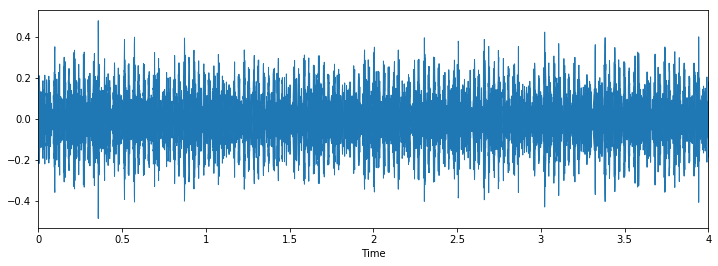

In [13]:
i = random.choice(train.index)
audio_name = train.ID[i]
file_name = os.path.join(os.path.abspath(data_dir), 'Train', str(audio_name) + '.wav')
print('Class: ', train.Class[i])
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)
temp = train.apply(parser, axis=1)
temp.columns = ['feature', 'label']


In [62]:
temp

,feature,label
0,"[-82.12358939071989, 139.50591598130987, -42.4...",siren
1,"[-15.744005405358058, 124.1199599305049, -29.4...",street_music
2,"[-123.39365145003913, 15.181946313102896, -50....",drilling
3,"[-213.27878814908152, 89.32358896182456, -55.2...",siren
4,"[-237.92647882472895, 135.90246127730546, 39.2...",dog_bark
5,None,None
6,"[-203.97553041599923, 83.95814057767474, -66.7...",street_music
7,"[-55.40055461612478, 22.767318943295965, -46.0...",drilling
8,"[-110.22915733719984, 91.25898699199308, -137....",gun_shot
9,"[-337.7600192890491, 140.77517821184472, -15.5...",dog_bark
